<a href="https://colab.research.google.com/github/Pourixa/FraudulentPayments/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'online-payment-fraud-detection' dataset.
Path to dataset files: /kaggle/input/online-payment-fraud-detection


In [2]:
import pandas as pd

df = pd.read_csv(path + "/onlinefraud.csv").drop("isFlaggedFraud",axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
Y = df["isFraud"]
X = pd.get_dummies(df.drop(["isFraud","nameOrig","nameDest"],axis=1),dtype=int)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [5]:
modelLR = LogisticRegression()
scoresLR = cross_validate(modelLR,X_train,y_train,cv=5)

In [6]:
scoresLR

{'fit_time': array([11.45878315, 11.85006452, 11.98636866, 11.62630844, 12.04769039]),
 'score_time': array([0.06719542, 0.05998111, 0.06059003, 0.06682491, 0.06536365]),
 'test_score': array([0.99921121, 0.99918174, 0.99916897, 0.99915129, 0.99913361])}

In [7]:
modelLR.fit(X_train,y_train)

LogisticRegression()

In [8]:
modelLR.score(X_test,y_test)

0.9991300753463196

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import EarlyStopping

In [10]:
X_train , _x , y_train , _y = train_test_split(X,Y,test_size=0.4)
x_val , x_test , y_val , y_test = train_test_split(_x,_y,test_size=0.5)

In [11]:
modelNN = Sequential(
    [
        Input(shape=(X_train.shape[1],)),
        Dense(11,activation="relu",),
        Dense(1,activation="sigmoid")

    ]
)
es = EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)
modelNN.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=["accuracy"])

In [15]:
modelNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
modelNN.fit(X_train,y_train,epochs=15,validation_data=(x_val,y_val),callbacks=[es])

Epoch 1/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 292s 2ms/step - accuracy: 0.9983 - loss: 0.0096 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 2/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 295s 2ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 3/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 294s 2ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 4/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 298s 2ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 5/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 298s 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 6/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 299s 3ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0029
Epoch 7/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 287s 2ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 8/15
119300/119300 ━━━━━━━━━━━━━━━━━━━━ 29

In [17]:
modelNN.evaluate(x_test,y_test)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 67s 2ms/step - accuracy: 0.9995 - loss: 0.0030


[0.0028778458945453167, 0.999534010887146]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

modelDT=DecisionTreeClassifier()

In [20]:
scoresDT = cross_validate(modelDT,X_train,y_train,cv=5)

In [21]:
scoresDT

{'fit_time': array([71.05258346, 64.91705465, 68.38257003, 63.97089744, 65.51537442]),
 'score_time': array([0.22641039, 0.11273813, 0.11767864, 0.10818624, 0.11431408]),
 'test_score': array([0.99969942, 0.99970727, 0.99968173, 0.99967486, 0.99969843])}

In [22]:
modelDT.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
modelDT.score(X_test,y_test)

0.9997100251154398

[Text(0.9411879960595694, 0.9871794871794872, 'x[0] <= 3.338\ngini = 0.003\nsamples = 5090096\nvalue = [5083471, 6625]'),
 Text(0.9402180639548168, 0.9615384615384616, 'x[1] <= 3.081\ngini = 0.003\nsamples = 5089867\nvalue = [5083471, 6396]'),
 Text(0.940703030007193, 0.9743589743589745, 'True  '),
 Text(0.8877106186952786, 0.9358974358974359, 'x[10] <= 1.503\ngini = 0.002\nsamples = 5055483\nvalue = [5050416, 5067]'),
 Text(0.8250506930161633, 0.9102564102564102, 'x[1] <= 1.31\ngini = 0.001\nsamples = 4662738\nvalue = [4660188.0, 2550.0]'),
 Text(0.7723507192040044, 0.8846153846153846, 'x[1] <= -0.298\ngini = 0.001\nsamples = 4661926\nvalue = [4659826, 2100]'),
 Text(0.7713807870992518, 0.8589743589743589, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.7733206513087572, 0.8589743589743589, 'x[1] <= 1.022\ngini = 0.001\nsamples = 4661915\nvalue = [4659826, 2089]'),
 Text(0.6708304999986976, 0.8333333333333334, 'x[0] <= 1.16\ngini = 0.001\nsamples = 4660558\nvalue = [4658586, 197

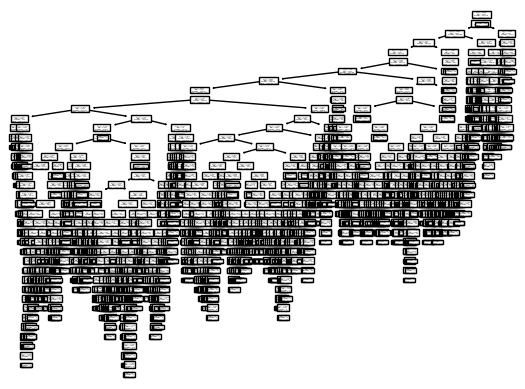

In [24]:
plot_tree(modelDT)

In [25]:
print(modelDT.score(X_test,y_test)) #  the best
print(modelLR.score(X_test,y_test))
print(modelNN.evaluate(x_test,y_test)[1])

0.9997100251154398
0.9991575797391641
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.9978 - loss: 0.0491
0.9978514909744263
